# Simulated Annealing and application on Spin Glass Systems





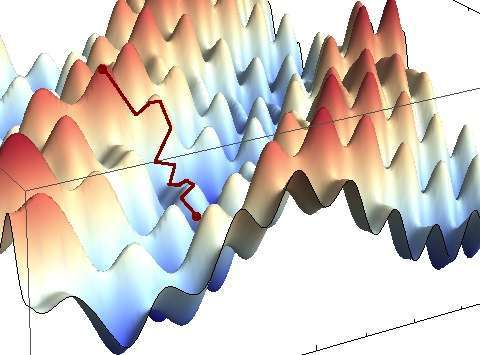

Image: A spikey and rough energy landscape with many local minima. A red arrow shows the trajectory of motion towards a global minima with simulated annealing. Image credit: https://victoryepes.blogs.upv.es/tag/simulated-annealing/

## <span style="color:Orange">Overview</span>

>

Simulated annealing is a common tool in both condensed matter and machine learning. The basic idea is to heat* up a system and cool it down incrementally to find the ground energy state. In this project you will learn about how simulated annealing can be used to solve a wide varriety of problems in physics and machine learning. You will also implement a simple simulated annealing code to find the ground state of an arbitrary spin glass (ising model) with periodic boundary conditions.

*In non-physical situations such as machine learning the word "heat" here is used loosely.




Suggested Resources:

https://gorayni.github.io/blog/2014/05/22/simulated-annealing.html



## <span style="color:Orange">Questions</span>

### <span style="color:LightGreen">Question 01</span>

Describe what simulated annealing is. What are the basic steps of a simulated annealing algorithm? What is the importance of setting the temperature and cooling schedule?

### <span style="color:LightGreen">Question 02</span>

Breifly summarize how is it used to solve the traveling salesman problem in this paper: https://www.researchgate.net/publication/6026283_Optimization_by_Simulated_Annealing. The traveling salesman problem is considered NP-complete. What does NP-complete mean?


### <span style="color:LightGreen">Question 03</span>

How can simulated annealing help solve problems in machine learning? What are some other areas simulated annealing has been useful in?


### <span style="color:LightGreen">Question 04</span>

We will now focus on the topic of spin glasses and implement a simulated annealing code. The parts in this problems will walk you through the implementation. Let us first consider a triangular latice. Each point on the lattice contains one spin that can either be pointed up or down. For a more general model see the [Potts Model](https://en.wikipedia.org/wiki/Potts_model).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

Let us first define some simulation parameters. We will simulate an LXL box of spins arranged in a triangular lattice made up of equalateral triangles. The spins $S_i$ can have a value of $+1$ for up or $-1$ for down*. Each spin has 6 nearest neighbors. We will only consider nearest neighbor interactions according to the Ising model Hamiltonian:

$$H = \sum_{ij}J_{ij} S_i S_j $$

In general the coupling strength $J_{ij}$ can be various values but for simplicity, lets set it to a constant $J_{ij}=J=1$

$tmax$ is the number of timesteps we will execute.


In [ ]:
# Simulation parameters
L = 10  # lattice size (LxL)
tmax = 10000 # maximum timesteps
s = np.random.choice([-1, 1], size=(L, L))  # initial spin configuration
J = 1  # coupling strength
T = 80 #initial temperature

Now, let's generate lattice coordinates

In [ ]:
# Generate x, y coordinates for a triangular lattice
def generate_lattice_coordinates(L):
    """Generates (x, y) coordinates for a triangular lattice."""
    x_offset = np.sqrt(3) / 2  # Horizontal offset for hexagonal tiling
    y_offset = 1               # Vertical offset
    coordinates = []

    for i in range(L):
        for j in range(L):
            x = i * x_offset
            if j % 2 == 0:  # Even rows
                x -= x_offset / 2  # Shift even rows left
            y = j * y_offset
            coordinates.append((x, y))

    return np.array(coordinates).reshape(L, L, 2)

Now, for a specific spin $s_{ij}$ lets retrieve its six neighbors. In order to plot our lattice in a square shaped frame, we had to introduce shifts on even numbered rows. We take this into account for indexing neighbors.

In [ ]:
# Function to get nearest neighbors for a triangular lattice
def get_neighbors(L, i, j):
    """Returns the nearest neighbors of a spin in a triangular lattice."""
    # Even rows neighbors
    if j % 2 == 0:
        neighbors = [((i - 1) % L, j),       # left
                      ((i + 1) % L, j),       # right
                      (i, (j - 1) % L),       # lower right
                      (i, (j + 1) % L),       # upper right
                      ((i - 1) % L, (j + 1) % L),  # upper left
                      ((i - 1) % L, (j - 1) % L)]  # lower left
    # Odd rows neighbors
    else:
        neighbors = [((i - 1) % L, j),       # left
                      ((i + 1) % L, j),       # right
                      (i, (j - 1) % L),       # lower left
                      (i, (j + 1) % L),       # upper left
                      ((i + 1) % L, (j + 1) % L),  # upper right
                      ((i + 1) % L, (j - 1) % L)]  # lower right
    return neighbors

We will now plot the initial spin state!

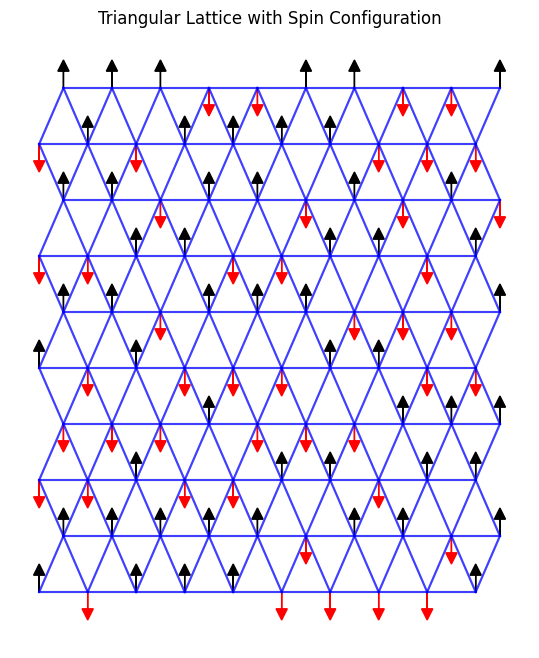

In [ ]:
# Function to plot triangular lattice with arrows and neighbor connections
def plot_triangular_lattice(s, L):
    coordinates = generate_lattice_coordinates(L)  # Get lattice coordinates
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot lattice lines and spins
    for i in range(L):
        for j in range(L):
            x, y = coordinates[i, j]

            # Draw lines between neighbors to form the triangular lattice
            neighbors = get_neighbors(L, i, j)
            for ni, nj in neighbors:
                    x_n, y_n = coordinates[ni, nj]
                    if(np.sqrt((x-x_n)**2+(y-y_n)**2)<1.2): #avoids plotting lines connecting periodic boundary for clarity
                      ax.plot([x, x_n], [y, y_n], 'b-', alpha=0.5)  # blue lattice lines

            # Draw up/down arrows for spin configuration
            if s[i, j] == 1:
                ax.arrow(x, y, 0, 0.3, head_width=0.2, head_length=0.2, fc='k', ec='k')  # up arrow
            else:
                ax.arrow(x, y, 0, -0.3, head_width=0.2, head_length=0.2, fc='r', ec='r')  # down arrow

    # Set equal scaling and hide axes for clarity
    ax.set_aspect('equal')
    ax.set_axis_off()
    plt.title("Triangular Lattice with Spin Configuration")
    plt.show()

plot_triangular_lattice(s, L)

Now we set the initial temperature and cooling schedule. The schedule should be an array of temperatures to cool to at each time step. Here's a good choice of schedule.

$$T(t) = \frac{T_0}{log(t+1)}$$

In [ ]:
timesteps = np.arange(1,tmax+1)

#YOUR CODE HERE


Now we are finally ready to implement the Hamiltonian

In [ ]:
# Define the Hamiltonian for the triangular lattice (nearest neighbor interactions)
def H(s,L, J):
## YOUR CODE HERE
  raise NotImplementedError
  return total_energy

Earlier in class, we studied the Metropolis Algorithm. A time step in simulated annealing is quite similar. Except whether or not we accept the new state (in our case the spin configuration) with energy higher than in the previous step depends on temperature. Lets define a propegation function. The propegation will pick a random spin and flip it. It will also calculate Eold and Enew with the H function you already defined.

Now all you need to do is decide on a criterion to accept or reject the new state. If Enew < Eold, accept the new state.
If Eold > Enew, accept the new state if $e^{\frac{E_{new}-E_{old}}{T}}$ is greater than or equal to a random number between 0 and 1.

Otherwise, keep the old state.

In [ ]:
# Function for timestep propagation
def prop(s, temp):
    #YOUR CODE HERE
    return s

Now we will fold over the schedule by calling prop(s,temp) however many times. I reccomend saving intermediate states so you can plot the energy over time steps later.

In [ ]:
#start folding!
ss = [s] # this is so you can save intermediate states as you change s directly. use ss.append(s) after each timestep.
H_values = []

#YOUR CODE HERE

Now plot your final state as well as the energy over time (or equivalently temperature)

In [ ]:
#YOUR CODE HERE

### <span style="color:LightGreen">Question 05</span>

What do you expect as the final state for J=1? What type of magnet does this represent? What type of magnet do you get for J = -1? (We will implement this in Q6)

Your answer here



### <span style="color:LightGreen">Question 06</span>

Now repeat the steps in question 4 except with J=-1. This is an example of frustration. In general there can be a [number of degenerate ground states in a quantum spin system](https://https://en.wikipedia.org/wiki/File:Frustrated_magnetism.webm). Do you see why simulated annealing becomes relevant to find the ground state in this case? How does frustration in spin glasses lead to "scale free behavior*", ie if you zoom out at an arbitrary scale and "[coarse-grain](https://https://en.wikipedia.org/wiki/Coarse-grained_modeling)" you recover the same exact observations as if you were looking at the original lattice.

*behavior is only truely scale free for an infinite system. Of course real systems are never infinite and this becomes a recurring subtlty in the field of condensed matter, critcial phenomona, and anywhere statistical mechanics or statistical field theory is used.

Your answer here

Congrats! You are now equipt with the tools to find the ground state of an arbitrary spin glass in any type of geometry (or lack there of, for in general glasses do not fit on nice lattices)

---

## <span style="color:Orange">References</span>


I still need to update refs

https://victoryepes.blogs.upv.es/tag/simulated-annealing/

https://en.wikipedia.org/wiki/Spin_glass

---

## <span style="color:Orange">Acknowledgements</span>

* Initial version: Mayisha Zeb Nakib
* Based on Mathematica Notebook by Porter Howland

© Copyright 2023